<a href="https://colab.research.google.com/github/hesithaw/Presidential-Survey/blob/master/Election_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

!pip install --upgrade -q gspread

import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Presidential Election 2019 - ඡන්ද දායකයින්ගේ මතය පිළිබද සමීක්ෂණය (Responses)').sheet1
rows = worksheet.get_all_values()


**Count votes for each candidate within each age group**

In [0]:
candidate_votes_agegroup={}
for each in rows[1:]:
  candidate=candidate_votes_agegroup.get(each[1])
  if not candidate:
    candidate_votes_agegroup[each[1]]={}
  age_group = candidate_votes_agegroup[each[1]].get(each[6])
  if age_group:
    candidate_votes_agegroup[each[1]][each[6]]+=1
  else:
    candidate_votes_agegroup[each[1]][each[6]]=1


In [4]:
candidate_votes_agegroup

{'අනුර කුමාර දිසානායක(Anura Kumara Disanayake) (NPP)': {'25-34': 5,
  '35-44': 4},
 'ගෝඨාභය රාජපක්ෂ(Gotabaya Rajapaksha) (SLPP)': {'18-24': 3,
  '25-34': 69,
  '35-44': 10,
  '45-54': 3,
  '65+': 1},
 'ජෙනරාල් මහේෂ් සේනානායක(Mahesh Senanayake)': {'25-34': 24, '35-44': 1},
 'ප්\u200dරතික්ෂේප කරන ලදි(Refused)': {'25-34': 6},
 'සජිත් ප්\u200dරේමදාස(Sajith Premadasa) (UNP)': {'25-34': 8, '45-54': 1}}

**Vectorize the data such a way that can be plotted**

In [0]:
X=['18-24','25-34','35-44','45-54','65+']
Y={}
for name in candidate_votes_agegroup.keys():
  Y[name]=[]
  for age in X:
    votes=candidate_votes_agegroup[name].get(age)
    if votes:
      Y[name].append(votes)
    else:
      Y[name].append(0)


**Calculate the percentage of votes within each age group for each candidate**

In [0]:
for i in range(0,len(X)):
  sum=0
  for name in Y.keys():
    sum+=Y[name][i]
  for name in Y.keys():
    Y[name][i]/=sum/100

In [11]:
Y

{'අනුර කුමාර දිසානායක(Anura Kumara Disanayake) (NPP)': [0.0,
  4.4642857142857135,
  26.666666666666668,
  0.0,
  0.0],
 'ගෝඨාභය රාජපක්ෂ(Gotabaya Rajapaksha) (SLPP)': [100.0,
  61.607142857142854,
  66.66666666666667,
  75.0,
  100.0],
 'ජෙනරාල් මහේෂ් සේනානායක(Mahesh Senanayake)': [0.0,
  21.428571428571427,
  6.666666666666667,
  0.0,
  0.0],
 'ප්\u200dරතික්ෂේප කරන ලදි(Refused)': [0.0, 5.357142857142857, 0.0, 0.0, 0.0],
 'සජිත් ප්\u200dරේමදාස(Sajith Premadasa) (UNP)': [0.0,
  7.142857142857142,
  0.0,
  25.0,
  0.0]}

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re

**Plot the data**

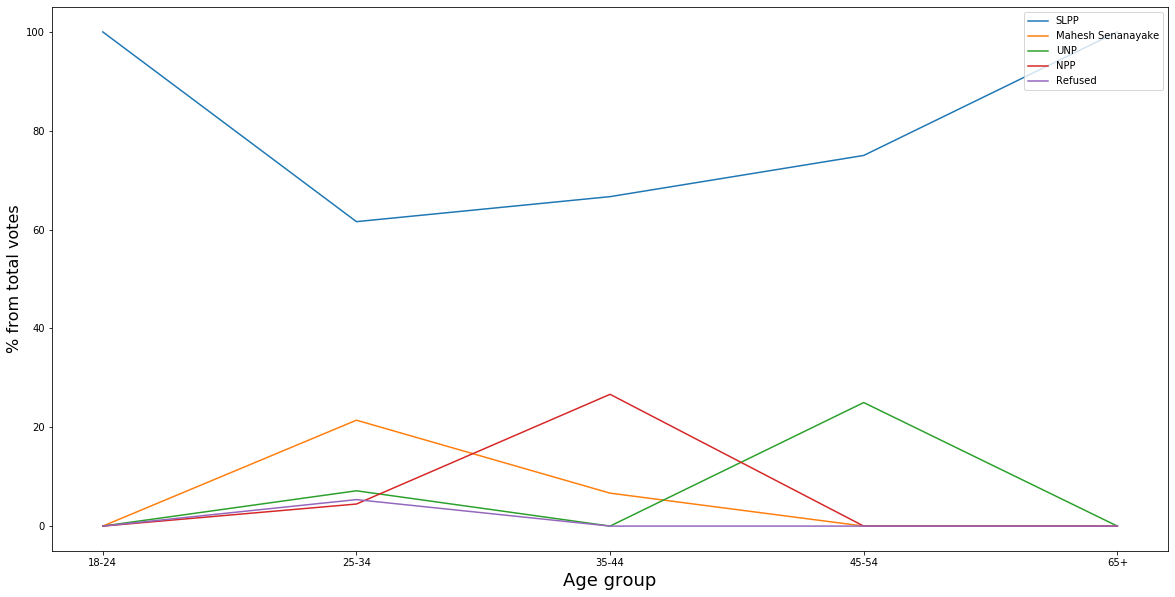

In [13]:
age_groups=np.array(X)
plt.figure(figsize=(20,10))
for name in Y:
  f = np.array(Y[name])
  plt.xticks(range(len(f)), age_groups)
  plt.plot(f)
plt.xlabel('Age group', fontsize=18)
plt.ylabel('% from total votes', fontsize=16)
plt.legend([re.sub('^.*\((.*?)\)[^\(]*$', '\g<1>', f) for f in Y.keys()], loc='upper right')